#### HUMAN ACTIVITY RECOGNITION VISUALISATION

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
# extracting the feature names from the .txt file
feature = []
names=[]
f = open("UCI HAR Dataset/features.txt", "r")
for word in f:
    feature.append(word.split("\n"))
for i in feature:
    names.append(i[0])

##### Train data 

In [3]:
# reading the X_train data from the .txt files
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=names)
# adding a column subject to the train.csv
X_train['subject'] = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', delim_whitespace=True, header=None, squeeze=True)

In [4]:
# reading the y_train from .txt files
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, squeeze=True, header=None)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
train = X_train 
train['Activites'] = y_train
train['Activity_name'] = y_train_labels

In [5]:
train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",subject,Activites,Activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [6]:
train.shape

(7352, 564)

##### Test files

In [7]:
X_test =  pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None, names = names)
X_test['subject'] = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True,names=['Activity'], header=None, squeeze=True)

In [8]:
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

In [9]:
test = X_test
test['Activity'] = y_test
test['Activity_name'] = y_test_labels

In [10]:
test.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",subject,Activity,Activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [11]:
test.shape

(2947, 564)

In [12]:
print("values unique in train colums ",(train.isnull().sum()).unique())

values unique in train colums  [0]


In [13]:
print("Values unique in test columns",(test.isnull().sum()).unique())

Values unique in test columns [0]


### Data Visualization


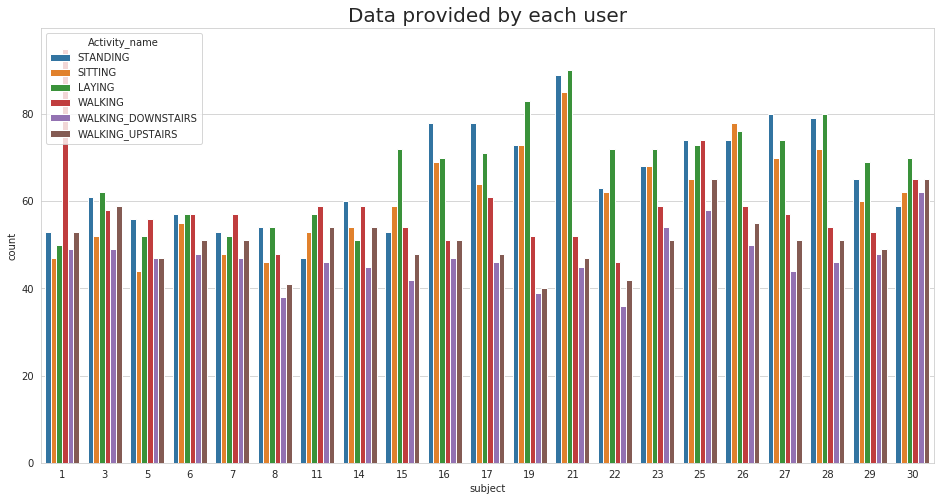

In [14]:
#count of activities per person for 6 activities
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity_name', data = train)
plt.show()

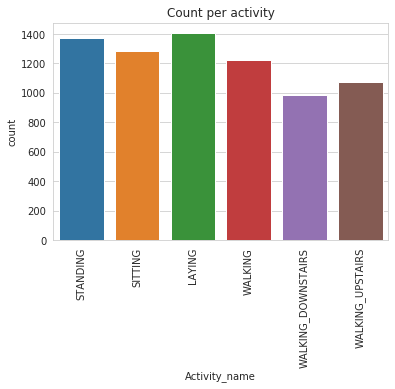

In [15]:
plt.title("Count per activity")
sns.countplot(train['Activity_name'])
# plt.figure(figsize = (8,10))
plt.xticks(rotation=90)
plt.rcParams['font.family']='DejaVu Sans'
plt.show()

In [16]:
columns = train.columns
# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')
train.columns = columns
test.columns = columns

In [17]:
# !mkdir CSV

In [18]:
'''transforming the text files to the train and test.csv'''

# train.to_csv('UCI HAR Dataset/CSV/train.csv', index=False)
# test.to_csv('UCI HAR Dataset/CSV/test.csv', index=False)

'transforming the text files to the train and test.csv'

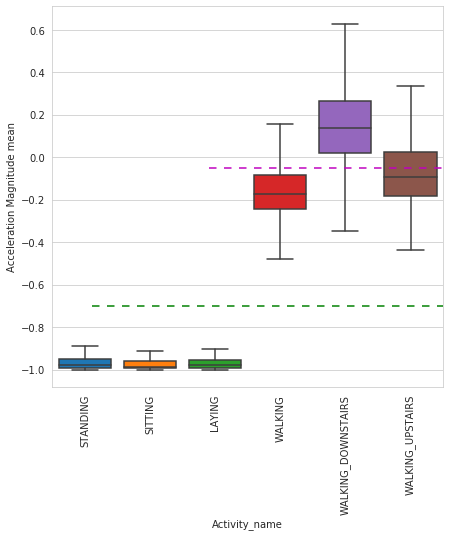

In [19]:
'''box and whisker plot'''
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity_name', y='201 tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=1.0,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, xmax = 1.0,dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

In [20]:
''' to make out the index number of the expert generted features'''
# n = [word for word in feature]
# for i in n:
#     st= "".join(i)
#     t = st.split(" ")
#     if('tBodyAccMag-mean()' in t[1]):
#         print(t)

' to make out the index number of the expert generted features'

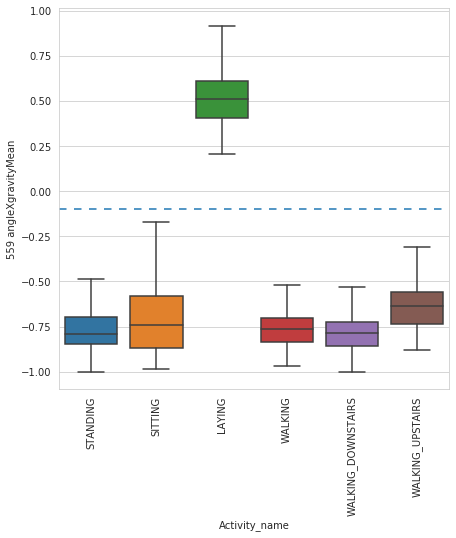

In [21]:
plt.figure(figsize=(7,7))
sns.boxplot(x ='Activity_name', y='559 angleXgravityMean', data=train, showfliers=False)
plt.axhline(y=-0.1,dashes=(5,5))
plt.xticks(rotation=90)
plt.show()

#### T-SNE 

In [22]:
#T-SNE visualization for the large dimensional data.
from sklearn.manifold import TSNE

In [41]:
def tsne(X_data, y_data, perplexities, n_iter=1000, epsilon=4):
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X= TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')    
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X[:,0], 'y':X[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
#         img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        plt.show()


performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.916s...
[t-SNE] Computed neighbors for 7352 samples in 59.681s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.149s
[t-SNE] Iteration 50: error = 114.0137177, gradient norm = 0.0219434 (50 iterations in 6.454s)
[t-SNE] Iteration 100: error = 97.5169296, gradient norm = 0.0163649 (50 iterations in

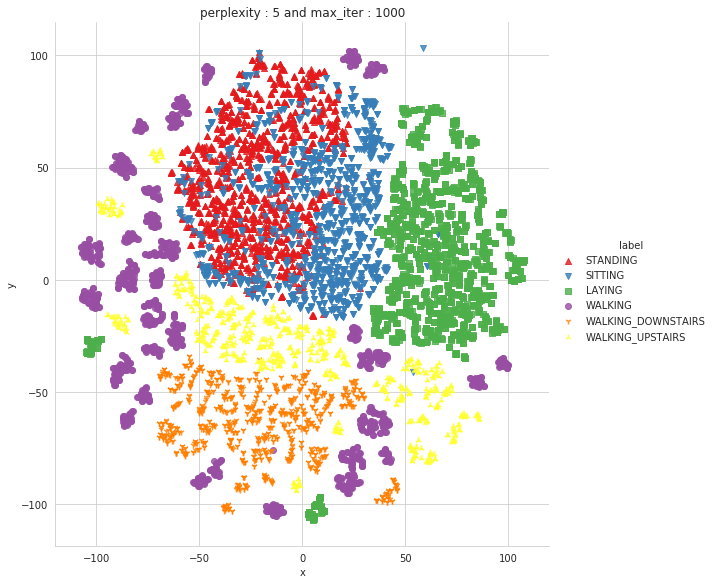


performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.913s...
[t-SNE] Computed neighbors for 7352 samples in 61.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.292s
[t-SNE] Iteration 50: error = 105.5257416, gradient norm = 0.0229487 (50 iterations in 6.807s)
[t-SNE] Iteration 100: error = 90.4723282, gradient norm = 0.0094849 (50 iterations i

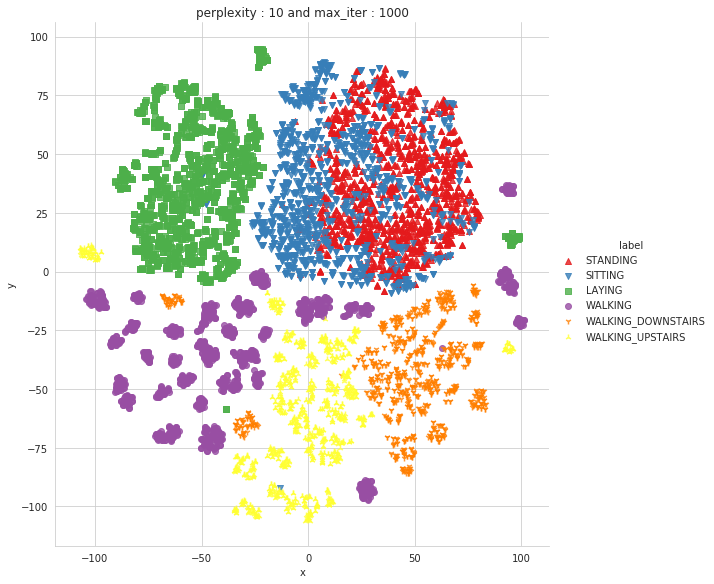


performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.962s...
[t-SNE] Computed neighbors for 7352 samples in 60.896s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.549s
[t-SNE] Iteration 50: error = 97.0603638, gradient norm = 0.0260660 (50 iterations in 5.202s)
[t-SNE] Iteration 100: error = 84.2021942, gradient norm = 0.0062905 (50 iterations in

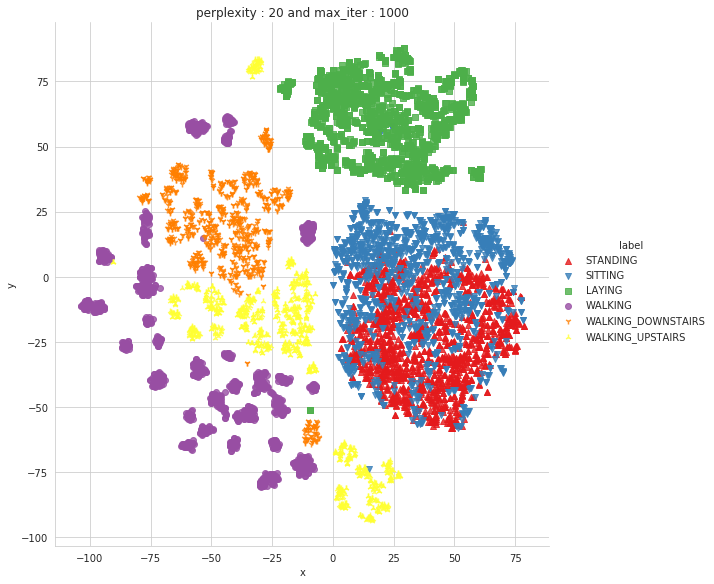


performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.888s...
[t-SNE] Computed neighbors for 7352 samples in 62.431s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 1.381s
[t-SNE] Iteration 50: error = 85.2969360, gradient norm = 0.0334446 (50 iterations in 6.265s)
[t-SNE] Iteration 100: error = 75.5209808, gradient norm = 0.0037920 (50 iterations i

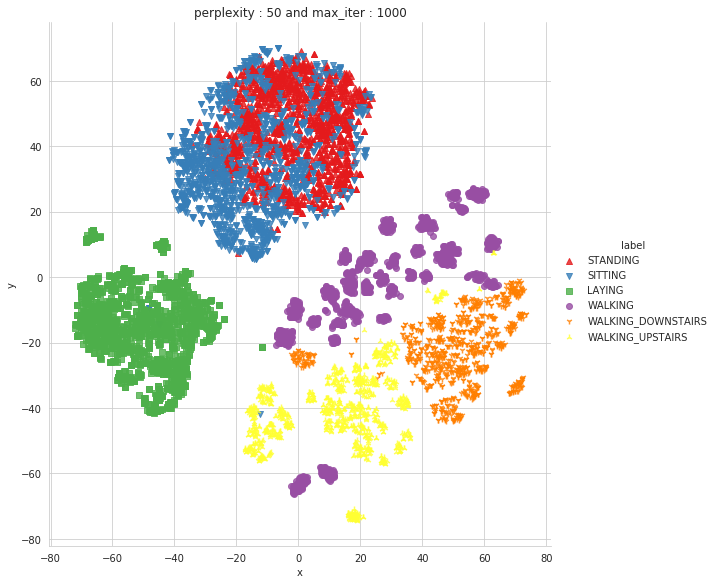

In [42]:
X_tsne = train.drop(['subject', 'Activites','Activity_name'], axis=1)
y_tsne = train['Activity_name']
tsne(X_data = X_tsne,y_data=y_tsne, perplexities =[5,10,20,50])